In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import concurrent.futures
import glob
%matplotlib inline

In [2]:
f=open('/home/ningxinLin/davis2018/data/DAVIS/ImageSets/2017/train.txt','r')
lines = f.readlines()
f.close()

In [24]:
mask_base_path = '/home/ningxinLin/davis2018/data/DAVIS/Annotations/480p/'
write_base_path = '/home/ningxinLin/DeepGrabCut_Davis_finetune/data/Davis2017/train/mask/'

In [35]:
for line in lines:
    line = line.strip()
    train_mask_dir = os.path.join(mask_base_path, line)
    write_path = os.path.join(write_base_path, line)
    assert(os.path.exists(train_mask_dir))
    if not os.path.exists(write_path):
        os.mkdir(write_path)
    '''
    for root, directions, files in os.walk(train_mask_dir):
        for mask in files:
            mask_path = os.path.join(root, mask)
            assert(os.path.exists(mask_path))
            mask = cv2.imread(mask_path,0)
            pic_num += (len(np.unique(mask))-1)
    '''
    with concurrent.futures.ProcessPoolExecutor() as executor:
        mask_files = glob.glob(train_mask_dir+'/*.png')
        executor.map(get_instance_mask, mask_files)

0


In [33]:
def get_instance_mask(path):
    
    assert os.path.isfile(path)
    base_name = path.split('/')[-1].split('.')[0]
    instance_num = 0
    mask = cv2.imread(path, 0)
    categorys = np.unique(mask)
    for category in categorys:
        if category == 0:
            continue
        instance_mask = (mask==category).astype(np.uint8)
        cv2.imwrite(write_path+'/'+base_name+'_'+str(instance_num)+'.png',instance_mask)
        instance_num += 1

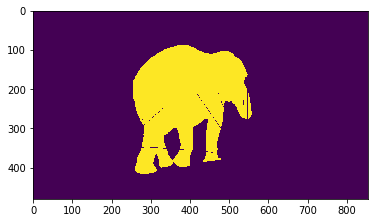

In [36]:
plt.imshow(cv2.imread('/home/ningxinLin/DeepGrabCut_Davis_finetune/data/Davis2017/train/mask/elephant/00000_0.png',0))